# 集成学习
吴雅妃 2210515003 房美贤 2210515014


In [2]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mpl_toolkits.mplot3d  # noqa: F401
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.sparse import csr_matrix # 导入scipy.sparse模块
from sklearn.model_selection import train_test_split


### 1. 数据集
**数据的基本信息**

iris 数据集，包含了 150 个样本，每个样本有四个特征：花瓣长度、花瓣宽度、萼片长度、萼片宽度 和一个标签用于表示鸢尾花的种类：setosa、versicolor、virginica。

In [3]:
iris = load_iris()
X = iris.data # features
y = iris.target # labels
print('鸢尾花的种类分别为：{}'.format(iris['target_names']))
print('鸢尾花的特征分别为：{}'.format(iris['feature_names']))

鸢尾花的种类分别为：['setosa' 'versicolor' 'virginica']
鸢尾花的特征分别为：['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


**数据的统计信息**

In [4]:
X_df = pd.DataFrame(X, columns=iris.feature_names)
X_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**数据可视化**

绘制出数据集在前三个特征的三维视图。

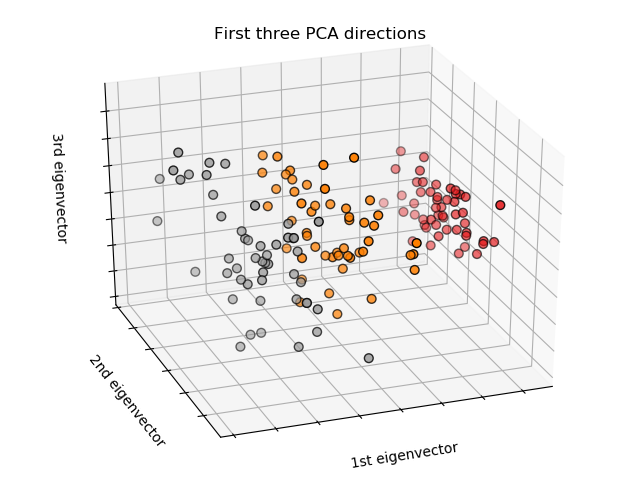

In [5]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

### 2. 数据预处理
标准化数据和划分数据集。

**标准化数据**

保证每个维度的特征数据方差为1，均值为0，使得预测结果不会被某些维度过大的特征值而主导。首先先将训练集和测试集提前分开，再分别进行预处理，训练集预处理时进行标准化时，保存好训练集的均值和方差。接着测试集利用刚保存的训练集的均值和方差进行标准化；在划分训练集和测试集时进行随机+层化采样。

# 提交作业时删除
**为什么训练集用 fit_transform ， 测试集用 transform**

transform 是拿train，test合并后的数据的属性值对所有数据做处理，fit_transform + transform 则是只用train的属性对train和test做处理，在实际数据处理中，推荐使用第二种处理方式，也就是都是利用训练集 train 得到的均值方差等数据对 test 数据集进行处理，第一种处理方式（训练集测试集合并处理）**在把训练集和测试集放在一块PCA的时候，相当于训练集和测试集互相引入了信息，后来训练的网络很可能过拟合，准确率也虚高。**

预处理时：

训练集 测试集提前分开，划分好；

训练集预处理时，保存好训练集的均值+方差，它的零均值化，标准化正常进行；

测试集利用刚保存的训练集的均值+方差进行零均值化，标准化；


PCA降维时：

预处理后的训练集 测试集依然分开；

用训练集进行PCA降维，得到投影矩阵P；

测试集利用刚训练集得到的投影矩阵P进行降维；

————————————————

版权声明：本文为CSDN博主「Systemd」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。
原文链接：https://blog.csdn.net/wwyy2018/article/details/89924100

In [6]:
# 使用shuffle参数进行随机打乱，使用stratify参数进行层化采样。
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# # 查看训练集和测试集中各个类别的比例
# import numpy as np
# print(np.bincount(y_train) / len(y_train))
# print(np.bincount(y_test) / len(y_test))

# 将特征缩放成均值为0，方差为1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### 3. 分类
分别使用 **lr** 和 **svm** 进行分类

**PCA**

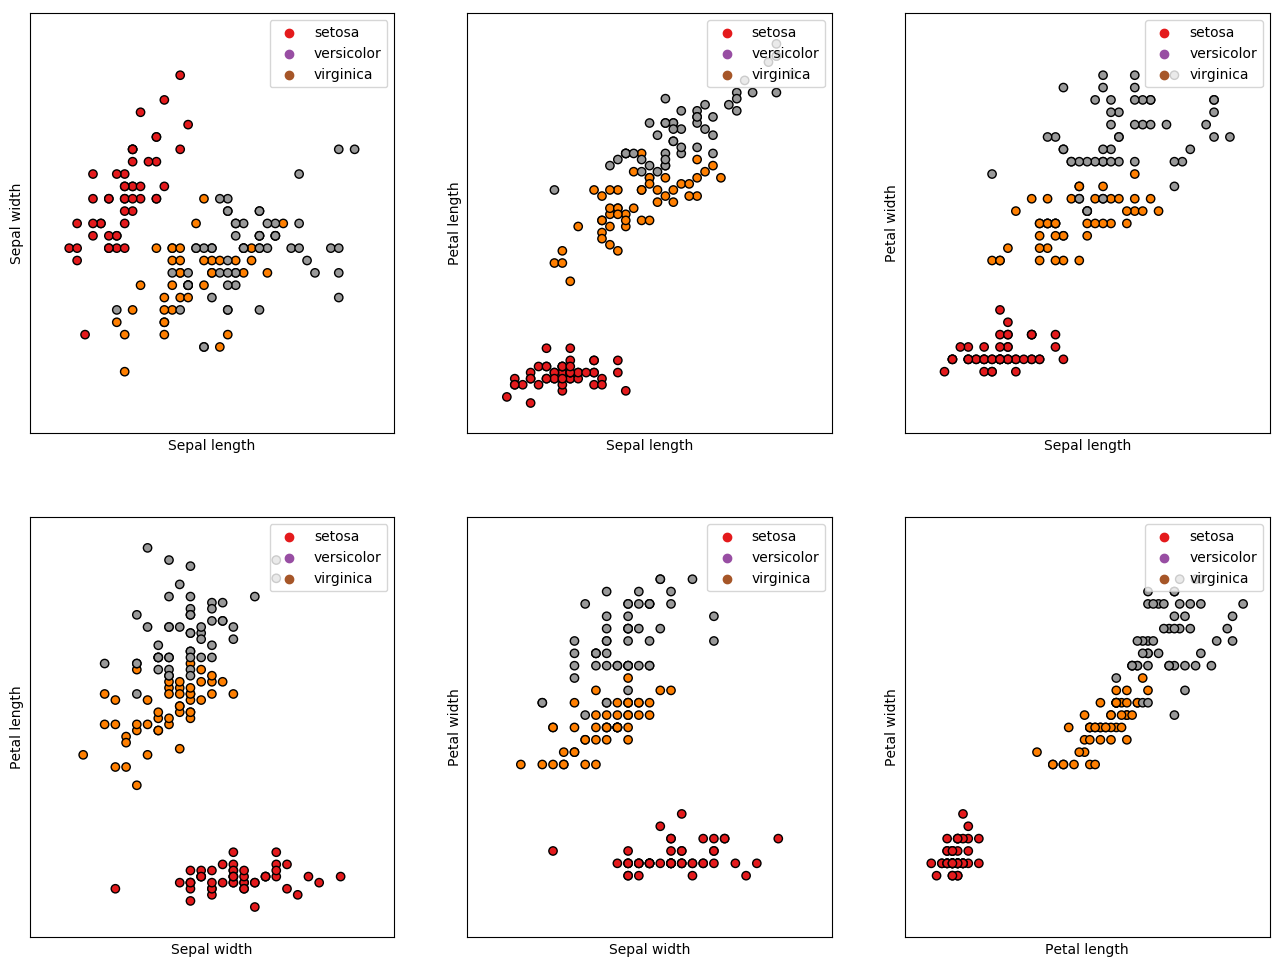

In [7]:
# 定义一个函数，用于绘制散点图
def plot_scatter(X, xlabel, ylabel):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    # 添加一个图例，显示不同颜色对应的label
    plt.legend(handles=[plt.scatter([], [], color=plt.cm.Set1(i/3), label=iris.target_names[i]) for i in range(3)], loc='upper right')

# 定义六个数据集
X1 = iris.data[:, [0,1]]  # we only take the first two features.
X2 = iris.data[:, [0,2]]  # we only take the first and the third features.
X3 = iris.data[:, [0,3]]  # we only take the first and the fourth features.
X4 = iris.data[:, [1,2]]  # we only take the second and the third features.
X5 = iris.data[:, [1,3]]  # we only take the second and the fourth features.
X6 = iris.data[:, [2,3]]  # we only take the third and the fourth features.

# 创建一个新的图形对象，并设置它的大小为16*12英寸
plt.figure(figsize=(16, 12))
plt.clf()

# 在图形对象中绘制六个子图，每个子图对应一个数据集
plt.subplot(2, 3, 1) # 第一行第一列的子图
plot_scatter(X1, "Sepal length", "Sepal width")

plt.subplot(2, 3, 2) # 第一行第二列的子图
plot_scatter(X2, "Sepal length", "Petal length")

plt.subplot(2, 3, 3) # 第一行第三列的子图
plot_scatter(X3, "Sepal length", "Petal width")

plt.subplot(2, 3, 4) # 第二行第一列的子图
plot_scatter(X4, "Sepal width", "Petal length")

plt.subplot(2, 3, 5) # 第二行第二列的子图
plot_scatter(X5, "Sepal width", "Petal width")

plt.subplot(2, 3, 6) # 第二行第三列的子图
plot_scatter(X6, "Petal length", "Petal width")



观察可知，使用特征 **Petal width** 很容易能区分出 **setosa** 这一品种的鸢尾花

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
lr = LogisticRegression()
lr.fit(X_train, y_train)
svm = SVC()
svm.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_pred_lr2 = lr.predict(X_train)

y_pred_svm = svm.predict(X_test)
print('y_pred_lr:',y_pred_lr)
print('y_pred_svm:',y_pred_svm)
from sklearn.metrics import accuracy_score
acc_lr=accuracy_score(y_test, y_pred_lr)
acc_svm=accuracy_score(y_test, y_pred_svm)
print('acc_lr:',acc_lr)
print('acc_svm:',acc_svm)

lr_train = accuracy_score(y_train, y_pred_lr2)
print(lr_train)

y_pred_lr: [1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
y_pred_svm: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 2 0 0]
acc_lr: 0.9555555555555556
acc_svm: 0.9555555555555556
0.9619047619047619


### 4. Bagging
使用决策树作为基学习器，并给出在包外估计下的性能指标。

In [150]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
# 使用带有10棵决策树的集成学习器
bag = BaggingClassifier(dt, n_estimators=10, oob_score=True)
bag.fit(X_train, y_train)
# 获得包外估计得分
oob_score = bag.oob_score_
print(f"包外得分: {oob_score}")
y_pred_bag = bag.predict(X_test)
# 在测试集中设置性能指标
acc_bag = accuracy_score(y_test, y_pred_bag)
pre_bag = precision_score(y_test, y_pred_bag, average='macro')
rec_bag = recall_score(y_test, y_pred_bag, average='macro')
f1_bag = f1_score(y_test, y_pred_bag, average='macro')
print(f"测试集的集成性能指标:")
print(f"Accuracy: {acc_bag}")
print(f"Precision: {pre_bag}")
print(f"Recall: {rec_bag}")
print(f"F1-score: {f1_bag}")


包外得分: 0.9238095238095239
测试集的集成性能指标:
Accuracy: 0.9777777777777777
Precision: 0.9761904761904763
Recall: 0.9743589743589745
F1-score: 0.974320987654321


### 5. Boosting
利用sklearn中AdaBoost与GBDT实现分类。

In [151]:
dt = DecisionTreeClassifier()
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
# 集成十颗决策树的AdaBoost算法
ada = AdaBoostClassifier(dt, n_estimators=10)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
acc_ada = accuracy_score(y_test, y_pred_ada)
pre_ada = precision_score(y_test, y_pred_ada, average='macro')
rec_ada = recall_score(y_test, y_pred_ada, average='macro')
f1_ada = f1_score(y_test, y_pred_ada, average='macro')
print(f"测试集的AdaBoost集成性能指标:")
print(f"Accuracy: {acc_ada}")
print(f"Precision: {pre_ada}")
print(f"Recall: {rec_ada}")
print(f"F1-score: {f1_ada}")

# 集成十颗决策树的GBDT算法
gbdt = GradientBoostingClassifier(n_estimators=10)
gbdt.fit(X_train, y_train)
y_pred_gbdt = gbdt.predict(X_test)
acc_gbdt = accuracy_score(y_test, y_pred_gbdt)
pre_gbdt = precision_score(y_test, y_pred_gbdt, average='macro')
rec_gbdt = recall_score(y_test, y_pred_gbdt, average='macro')
f1_gbdt = f1_score(y_test, y_pred_gbdt, average='macro')
print(f"测试集的GBDT集成性能指标:")
print(f"Accuracy: {acc_gbdt}")
print(f"Precision: {pre_gbdt}")
print(f"Recall: {rec_gbdt}")
print(f"F1-score: {f1_gbdt}")

测试集的AdaBoost集成性能指标:
Accuracy: 0.8666666666666667
Precision: 0.8947368421052632
Recall: 0.8461538461538461
F1-score: 0.8375
测试集的GBDT集成性能指标:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


### 6.随机森林：


In [152]:

from sklearn.ensemble import RandomForestClassifier
# 使用集成10棵树和默认参数的随机森林
rf_default = RandomForestClassifier(n_estimators=10)
rf_default.fit(X_train,y_train)
y_pred_rf_default = rf_default.predict(X_test)
acc_rf_default = accuracy_score(y_test,y_pred_rf_default)
pre_rf_default = precision_score(y_test,y_pred_rf_default ,average='macro')
rec_rf_default= recall_score(y_test,y_pred_rf_default ,average='macro')
f1_rf_default= f1_score(y_test,y_pred_rf_default ,average='macro')
print(f"测试集的RandomG集成性能指标(n_estimators=10):")
print(f"Accuracy: {acc_rf_default}")
print(f"Precision: {pre_rf_default}")
print(f"Recall: {rec_rf_default}")
print(f"F1-score: {f1_rf_default}")

# 使用集成10棵树和默认参数的随机森林
rf_more_trees = RandomForestClassifier(n_estimators=20)
rf_more_trees.fit(X_train,y_train)
y_pred_rf_more_trees= rf_more_trees.predict(X_test)
acc_rf_more_trees= accuracy_score(y_test,y_pred_rf_more_trees )
pre_rf_more_trees= precision_score(y_test,y_pred_rf_more_trees ,average='macro')
rec_rf_more_trees= recall_score(y_test,y_pred_rf_more_trees ,average='macro')
f1_rf_more_trees= f1_score(y_test,y_pred_rf_more_trees ,average='macro')
print(f"测试集的RandomG集成性能指标(n_estimators=20):")
print(f"Accuracy: {acc_rf_more_trees}")
print(f"Precision: {pre_rf_more_trees}")
print(f"Recall: {rec_rf_more_trees}")
print(f"F1-score: {f1_rf_more_trees}")
# n_estimators=10 and sqrt features for each tree 
rf_sqrt_features= RandomForestClassifier(n_estimators=10,max_features="sqrt")
rf_sqrt_features.fit(X_train,y_train)
y_pred_rf_sqrt_features= rf_sqrt_features.predict(X_test)
acc_rf_sqrt_features= accuracy_score(y_test,y_pred_rf_sqrt_features )
pre_rf_sqrt_features= precision_score(y_test,y_pred_rf_sqrt_features ,average='macro')
rec_rf_sqrt_features= recall_score(y_test,y_pred_rf_sqrt_features ,average='macro')
f1_rf_sqrt_features= f1_score(y_test,y_pred_rf_sqrt_features ,average='macro')
print(f"测试集的RandomG集成性能指标(n_estimators=10 and sqrt features for each tree ):")
print(f"Accuracy: {acc_rf_sqrt_features}")
print(f"Precision: {pre_rf_sqrt_features}")
print(f"Recall: {rec_rf_sqrt_features}")
print(f"F1-score: {f1_rf_sqrt_features}")


测试集的RandomG集成性能指标(n_estimators=10):
Accuracy: 0.8666666666666667
Precision: 0.8947368421052632
Recall: 0.8461538461538461
F1-score: 0.8375
测试集的RandomG集成性能指标(n_estimators=20):
Accuracy: 0.9777777777777777
Precision: 0.9761904761904763
Recall: 0.9743589743589745
F1-score: 0.974320987654321
测试集的RandomG集成性能指标(n_estimators=10 and sqrt features for each tree ):
Accuracy: 0.9555555555555556
Precision: 0.9555555555555556
Recall: 0.9487179487179488
F1-score: 0.9484126984126983


观察上面的性能指标，可见所有算法在这个简单的数据集上，性能都表现完美，根据使用集成10棵树的随机森林和默认参数的随机森林在数据集上的训练观察特征重要性。

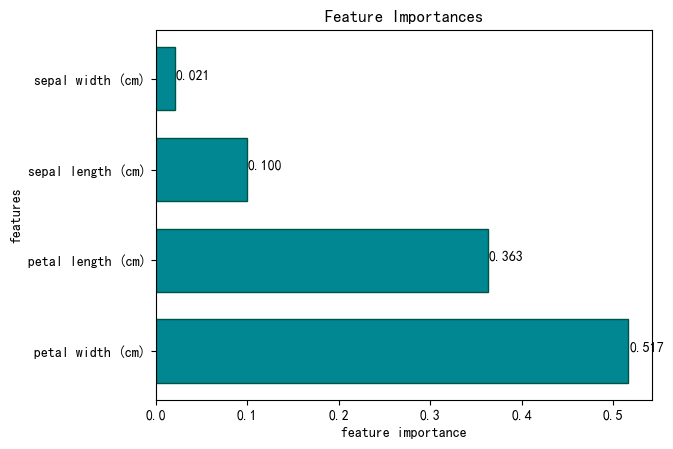

In [153]:
# 导入相关库
import pandas as pd
from sklearn.datasets import load_breast_cancer
from matplotlib import pyplot as plt
# 转换成DataFrame对象，并指定列名
data = pd.DataFrame(X_train, columns=iris.feature_names)
target = pd.DataFrame(y_train, columns=['target'])
# 获取特征重要性分数
feature_importance = pd.DataFrame(data.columns, columns=['feature'])
feature_importance['importance'] = rf_default.feature_importances_
# 对特征重要性分数进行排序
feature_importance.sort_values('importance', ascending=False, inplace=True)
# 绘制水平柱状图
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.barh(feature_importance['feature'], feature_importance['importance'], height=0.7, color ='#008792', edgecolor ='#005344') # 更多颜色可参见颜色大全
plt.xlabel('feature importance') # x 轴标签
plt.ylabel('features') # y轴标签
plt.title('Feature Importances') # 标题
for a,b in zip(feature_importance['importance'],feature_importance['feature']): # 添加数字标签
    plt.text(a+0.001, b,'%.3f'%float(a)) # a+0.001代表标签位置在柱形图上方0.001处
plt.show()